In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, fbeta_score

In [58]:
country_df = pd.read_csv('Country-data.csv')

In [59]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [60]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [61]:
country_df = pd.get_dummies(country_df, columns=['country'])
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_Afghanistan,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,...,0,0,0,0,0,0,0,0,0,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,...,0,0,0,0,0,0,0,0,0,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,...,0,0,0,0,0,0,0,0,0,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,...,0,0,0,0,0,0,0,0,0,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
scaler = StandardScaler()
x = scaler.fit_transform(country_df)

In [63]:
from sklearn.decomposition import PCA

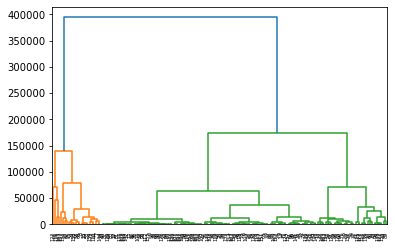

In [64]:
model = sch.dendrogram(sch.linkage(country_df, method='ward'))

In [65]:
x

array([[ 1.29153238e+00, -1.13827979e+00,  2.79088247e-01, ...,
        -7.76150526e-02, -7.76150526e-02, -7.76150526e-02],
       [-5.38948897e-01, -4.79658426e-01, -9.70161825e-02, ...,
        -7.76150526e-02, -7.76150526e-02, -7.76150526e-02],
       [-2.72832734e-01, -9.91216387e-02, -9.66073021e-01, ...,
        -7.76150526e-02, -7.76150526e-02, -7.76150526e-02],
       ...,
       [-3.72315412e-01,  1.13030491e+00,  8.87729775e-03, ...,
         1.28840987e+01, -7.76150526e-02, -7.76150526e-02],
       [ 4.48416682e-01, -4.06478275e-01, -5.97271589e-01, ...,
        -7.76150526e-02,  1.28840987e+01, -7.76150526e-02],
       [ 1.11495062e+00, -1.50347745e-01, -3.38015138e-01, ...,
        -7.76150526e-02, -7.76150526e-02,  1.28840987e+01]])

In [66]:
model = AgglomerativeClustering(n_clusters=5)
cluster = model.fit_predict(country_df)
country_df['cluster'] = cluster
country_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_Afghanistan,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,...,0,0,0,0,0,0,0,0,0,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,...,0,0,0,0,0,0,0,0,0,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,...,0,0,0,0,0,0,0,0,0,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,...,0,0,0,0,0,0,0,0,0,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,...,0,0,0,0,1,0,0,0,0,2
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,...,0,0,0,0,0,1,0,0,0,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,...,0,0,0,0,0,0,1,0,0,2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,...,0,0,0,0,0,0,0,1,0,2


In [67]:
x = country_df.drop('cluster', axis=1)
y = country_df['cluster']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [69]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [70]:
pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [71]:
models = {
    "LR" : LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    'DT' : DecisionTreeClassifier(),
    'SVC' : SVC(),
    'GNB' : GaussianNB(),
    'XGC' : XGBClassifier(use_label_encoder=False),
    'RF' : RandomForestClassifier(),
}

In [72]:
for name, model in models.items():
    print(f'Using : {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy : {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy : {accuracy_score(y_test, y_pred)}')
    print(f'Confusion Matrix :\n{confusion_matrix(y_test, y_pred)}')

Using : LR
Training Accuracy : 0.9774436090225563
Testing Accuracy : 0.7647058823529411
Confusion Matrix :
[[ 7  2  0  0]
 [ 1 18  0  0]
 [ 4  0  1  0]
 [ 1  0  0  0]]
Using : KNN
Training Accuracy : 0.9022556390977443
Testing Accuracy : 0.7647058823529411
Confusion Matrix :
[[ 4  5  0  0]
 [ 0 19  0  0]
 [ 2  0  3  0]
 [ 1  0  0  0]]
Using : DT
Training Accuracy : 1.0
Testing Accuracy : 0.6470588235294118
Confusion Matrix :
[[ 2  7  0  0]
 [ 0 19  0  0]
 [ 3  0  1  1]
 [ 1  0  0  0]]
Using : SVC
Training Accuracy : 0.9323308270676691
Testing Accuracy : 0.8529411764705882
Confusion Matrix :
[[ 7  2  0  0]
 [ 0 19  0  0]
 [ 2  0  3  0]
 [ 1  0  0  0]]
Using : GNB
Training Accuracy : 0.7969924812030075
Testing Accuracy : 0.5588235294117647
Confusion Matrix :
[[ 8  1  0  0]
 [11  8  0  0]
 [ 2  0  3  0]
 [ 1  0  0  0]]
Using : XGC
[14:38:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric u

In [74]:
model = SVC()

In [75]:
model.fit(x_train, y_train)

SVC()